In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np;
import seaborn as sns;
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pylab import *



In [2]:
helix = pd.read_csv('Hmap.csv')
helix.head()



,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [3]:
couplecol = helix[['Energy','helix 2 phase', 'helix1 phase']]
couplecol.head()

,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [4]:
couplecol = helix[['Energy','helix 2 phase', 'helix1 phase']]
couplecol.head()

,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [5]:
helix.shape

(16055, 27)

In [6]:
helix.columns


Index(['job_n', 'Energy', 'n_helices', 'r0_A', 'r0_B', 'r0_C', 'omega0',
       'delta_omega0_A', 'delta_omega0_B', 'delta_omega0_C', 'z0_offset_A',
       'z0_offset_B', 'z0_offset_C', 'helix1 phase', 'helix 2 phase',
       'helix3 phase', 'invert_A', 'invert_B', 'invert_C', 'z1_offset_A',
       'z1_offset_B', 'z1_offset_C', 'delta_t_A', 'delta_t_B', 'delta_t_C',
       'omega1', 'z1'],
      dtype='object')

In [7]:
couplecol = helix[['Energy','helix 2 phase', 'helix1 phase']]
ccouplecol = helix[['Energy','helix 2 phase', 'helix1 phase']]
couplecol.head()
couplecol.head()


,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [8]:
phase = couplecol.groupby(['helix1 phase', 'helix 2 phase']).mean()
print (phase.shape)
phase.head(10)

(80, 1)


Energy
helix1 phase helix 2 phase            
0            0             -397.530827
             20            -395.399835
             40            -394.417714
             60            -399.205867
             80            -400.224452
             100           -397.720420
             120           -397.548063
             140           -398.059762
             160           -397.214200
             180           -396.890299

In [9]:
phase = phase.reset_index()
phase.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-397.530827
1,0,20,-395.399835
2,0,40,-394.417714
3,0,60,-399.205867
4,0,80,-400.224452


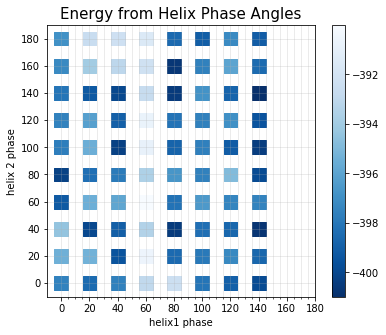

In [10]:
major_ticks = np.arange(0, 200, 20)
minor_ticks = np.arange(0, 180, 5)
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1)
s = ax.scatter('helix1 phase', 'helix 2 phase', c = 'Energy',data = phase, cmap = 'Blues_r', marker = 's',s = 190)
ax.axis([phase['helix1 phase'].min()-10, phase['helix1 phase'].max()+10, phase['helix 2 phase'].min()-10, phase['helix 2 phase'].max()+10])
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.grid(which='both', alpha = 0.3)
ax.grid(which='major', alpha=0.3)
ax.set_xlabel('helix1 phase', fontsize=10);
ax.set_ylabel('helix 2 phase', fontsize=10);
ax.set_title('Energy from Helix Phase Angles', size = 15)
cbar = plt.colorbar(mappable = s,ax = ax)
plt.show()
                                                                                                                

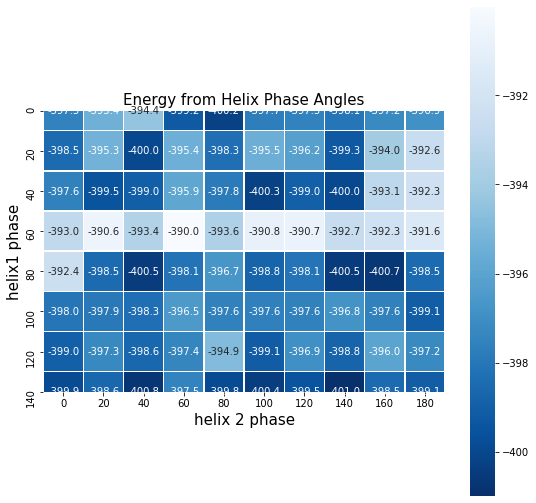

In [11]:
plt.figure(figsize=(9,9))
pivot_table = phase.pivot('helix1 phase', 'helix 2 phase','Energy')
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
plt.title('Energy from Helix Phase Angles', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [12]:
initdata = pd.read_csv('Hmap.csv')
initdata.head()

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [13]:
data = initdata[['helix1 phase', 'helix 2 phase', 'helix3 phase', 'Energy']]
data2 = data
data.head()

,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,-387.167
1,0,0,0,-402.606
2,0,0,0,-395.944
3,0,0,0,-389.788
4,0,0,0,-388.016


In [14]:
data = data.groupby(['helix1 phase', 'helix 2 phase', 'helix3 phase']).mean()
low = data2.groupby(['helix1 phase', 'helix 2 phase', 'helix3 phase']).min()
print (phase.shape)
data.head(10)

(80, 3)


Energy
helix1 phase helix 2 phase helix3 phase            
0            0             0            -395.044529
                           20           -400.790840
                           40           -393.041118
                           60           -401.785348
                           80           -395.876333
                           100          -391.257636
                           120          -399.147704
                           140          -396.649500
                           160          -399.487000
                           180          -398.920545

In [15]:
data = data.reset_index()
data2 = data2.reset_index()
data.head()

,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,-395.044529
1,0,0,20,-400.790840
2,0,0,40,-393.041118
3,0,0,60,-401.785348
4,0,0,80,-395.876333


In [16]:
data2.head()

,index,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,0,-387.167
1,1,0,0,0,-402.606
2,2,0,0,0,-395.944
3,3,0,0,0,-389.788
4,4,0,0,0,-388.016


In [17]:
 params = {'legend.fontsize': 'x-large',
 'figure.figsize': (15, 5),
 'axes.labelsize': '17',
 'axes.titlesize':'x-large',
 'xtick.labelsize':'x-large',
 'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


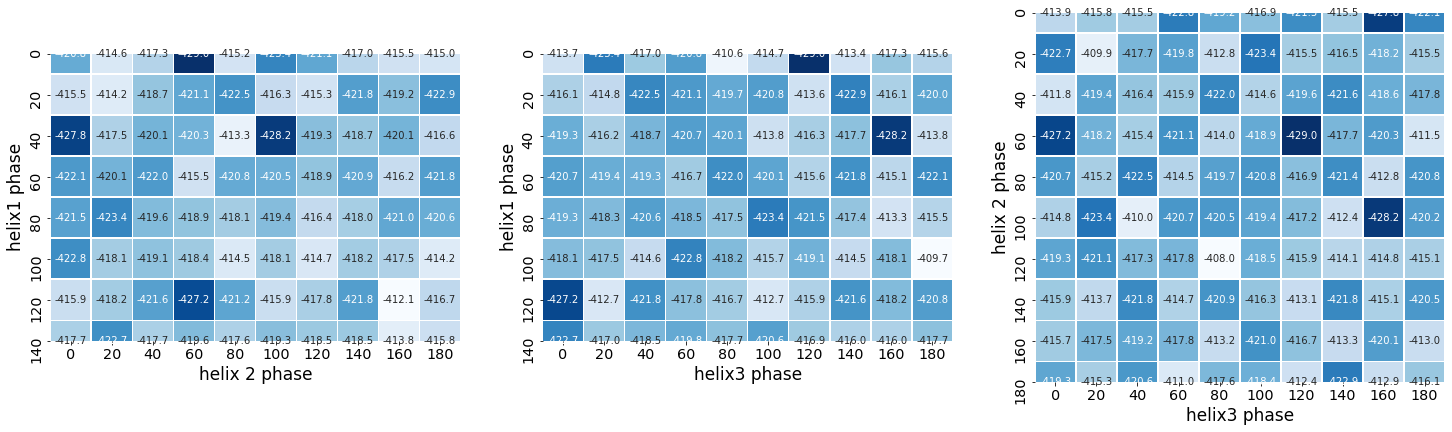

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (25,25));
filt_data = initdata[['helix1 phase', 'helix 2 phase', 'Energy']];
filt_data = filt_data.groupby(['helix1 phase', 'helix 2 phase']).min();
filt_data = filt_data.reset_index();
pivot_0_0 = filt_data.pivot('helix1 phase', 'helix 2 phase', 'Energy');
sns.heatmap(pivot_0_0, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);
filt_data = initdata[['helix1 phase', 'helix3 phase', 'Energy']];
filt_data = filt_data.groupby(['helix1 phase', 'helix3 phase']).min();
filt_data = filt_data.reset_index();
pivot_0_1 = filt_data.pivot('helix1 phase', 'helix3 phase', 'Energy');
sns.heatmap(pivot_0_1, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);
filt_data = initdata[['helix 2 phase', 'helix3 phase', 'Energy']];
filt_data = filt_data.groupby(['helix 2 phase', 'helix3 phase']).min();
filt_data = filt_data.reset_index();
pivot_0_2 = filt_data.pivot('helix 2 phase', 'helix3 phase', 'Energy');
sns.heatmap(pivot_0_2, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);